In [1]:
import argparse
import sys
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk
from tqdm import tqdm
from pathlib import Path

thispath = Path().resolve()
base_path = thispath.parent
sys.path.insert(0, str(base_path))
from utils import plots
from utils.metrics import dice_score, rel_abs_vol_dif, avd, haussdorf
from utils.plots import plot_dice, plot_hausorf, plot_ravd, plot_avd

In [ ]:
data_path = base_path / 'data'
test_set_path = data_path / 'test_set'
train_set_path = data_path / 'train_set'
val_set_path = data_path / 'validation_set'
params_path =  base_path / 'elastix' / 'parameter_maps' / 'Par0010'
our_atlas_path = data_path / 'ibsr_atlas'
mni_atlas_path = data_path / 'mni_atlas'

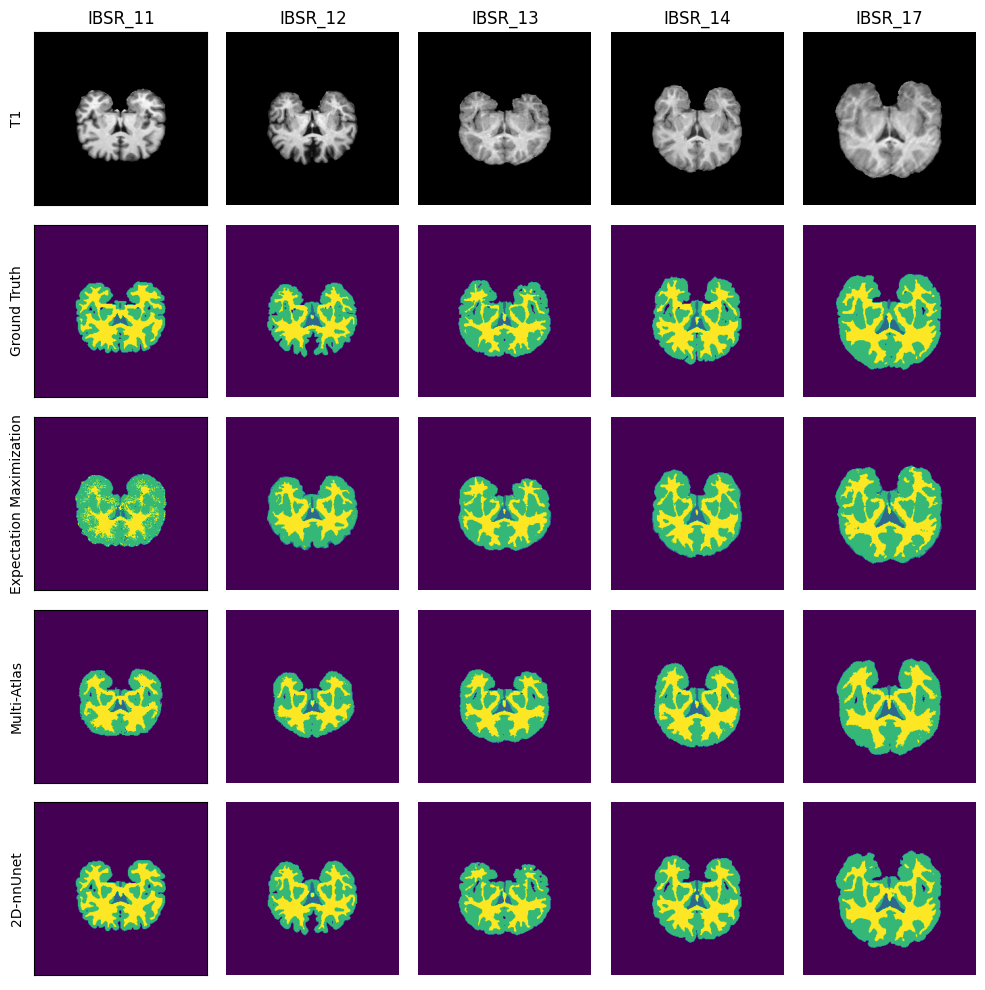

In [22]:
dl_path = base_path / 'experiments/dl/segmentations'
em_path = base_path / 'experiments/val_results/EM--tissue_models_init--atlas_after_multi/segmentations'
ma_path = base_path / 'experiments/simple_segmenters/multi_atlas_mi/segmentations'
t1_path = base_path / 'data/validation_set'

cases = ['IBSR_11', 'IBSR_12', 'IBSR_13', 'IBSR_14', 'IBSR_17']
fg, ax = plt.subplots(5,5, figsize=(10, 10))
slice_n = 70

for col, case in enumerate(cases):
    
    t1 = sitk.GetArrayFromImage(sitk.ReadImage(t1_path / case / f'{case}.nii.gz'))[:, slice_n, :]
    gt = sitk.GetArrayFromImage(sitk.ReadImage(t1_path / case / f'{case}_seg.nii.gz'))[:, slice_n, :]
    em = sitk.GetArrayFromImage(sitk.ReadImage(em_path / f'{case}.nii.gz'))[:, slice_n, :]
    ma = sitk.GetArrayFromImage(sitk.ReadImage(ma_path / f'{case}.nii.gz'))[:, slice_n, :]
    dl = sitk.GetArrayFromImage(sitk.ReadImage(dl_path / f'{case}.nii.gz'))[:, slice_n, :]

    ax[0, col].imshow(t1, cmap='gray')
    if col == 0:
        ax[0, col].set_yticklabels([])
        ax[0, col].set_xticklabels([])
        ax[0, col].set_xticks([])
        ax[0, col].set_yticks([])
        ax[0, col].set_ylabel('T1')
    else:
        ax[0, col].axis('off')
    ax[0, col].set_title(case)
    
    ax[1, col].imshow(gt, cmap='viridis')
    if col == 0:
        ax[1, col].set_yticklabels([])
        ax[1, col].set_xticklabels([])
        ax[1, col].set_xticks([])
        ax[1, col].set_yticks([])
        ax[1, col].set_ylabel('Ground Truth')
    else:
        ax[1, col].axis('off')
    
    ax[2, col].imshow(em, cmap='viridis')
    if col == 0:
        ax[2, col].set_yticklabels([])
        ax[2, col].set_xticklabels([])
        ax[2, col].set_xticks([])
        ax[2, col].set_yticks([])
        ax[2, col].set_ylabel('Expectation Maximization')
    else:
        ax[2, col].axis('off')
        
    ax[3, col].imshow(ma, cmap='viridis')
    if col == 0:
        ax[3, col].set_yticklabels([])
        ax[3, col].set_xticklabels([])
        ax[3, col].set_xticks([])
        ax[3, col].set_yticks([])
        ax[3, col].set_ylabel('Multi-Atlas')
    else:
        ax[3, col].axis('off')
        
    ax[4, col].imshow(dl, cmap='viridis')
    if col == 0:
        ax[4, col].set_yticklabels([])
        ax[4, col].set_xticklabels([])
        ax[4, col].set_xticks([])
        ax[4, col].set_yticks([])
        ax[4, col].set_ylabel('2D-nnUnet')
    else:
        ax[4, col].axis('off')
    
plt.tight_layout()
plt.savefig(base_path/'experiments'/'segmentations_fig.svg', bbox_inches='tight', format='svg')